<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> Fashion-MNIST
  </h2>
</div>


In [3]:
# import 
import numpy as np 
import matplotlib.pyplot as plt 

import tensorflow as tf 
from tensorflow import keras 
# import keras 

In [4]:
print(tf.__version__)

1.14.0


<img src= https://leejunhyun.github.io/assets/img/TensorFlow/Fashion-MNIST-01.png>

## EDA 
<img src=https://s3-ap-northeast-1.amazonaws.com/newstopics-production/url/2b6d5deda497d42e2d0516c27e9fd1b6e4192f51?1590738740 width=40%>

In [5]:
# data 불러오기 
fashion_mnist = keras.datasets.fashion_mnist
# train test split 불필요.. 
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
class_names = ['Top', 'Trouser','Pullover',
              'Dress','Coat', 'Sandal',
              'Shirt','Sneaker','Bag',
              'Ank']

In [7]:
# 사진 개수 , 가로, 세로 
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


컴퓨터에서 흑백이미지란 [0,255] 구간의 값으로 표시 된다. 
255 일수록 밝고 0일수록 어둡습니다. 

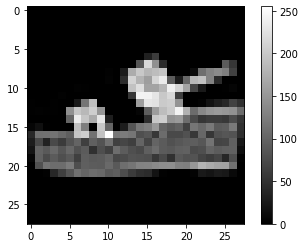

In [8]:
# 데이터 샘플링 
plt.imshow(train_images[12], cmap='gray') # image 보여주기 
plt.colorbar() # 오른쪽 컬러바
plt.show()

# scailing 작업 
[0,255] ---> [0,1]

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

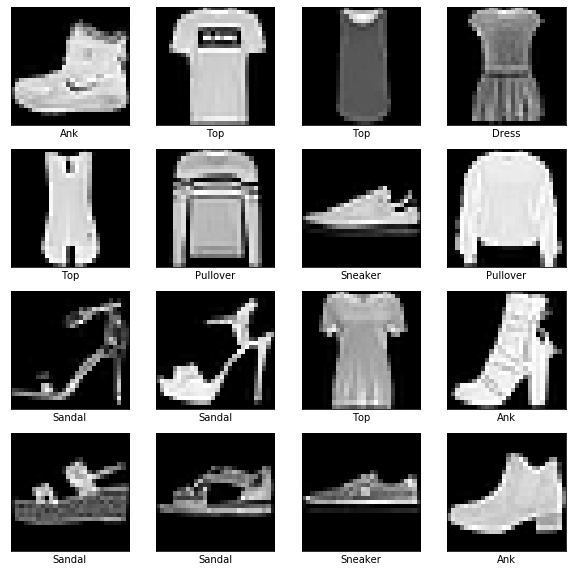

In [10]:
plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([]) # x 축에 아무것도 표시하지 않기
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델학습 

머신러닝과 다르게 feature engineering 과정이 필요가 없습니다. 

1. 분류 
    - 이진분류 : 클래스가 0/1 or 클래스 -1 / 1 -------> sigmoid
    - 멀티분류? : 클래스가 2 개이상            --------> softmax 

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 모델을 만들어보기 
  </h2>
</div>

정확도 87 이상 올리기

In [26]:
# model define 
model = keras.Sequential([
    # 초기 layer
    keras.layers.Flatten(input_shape=(28, 28)), # 이미지 사이즈를 넣어주기 == input 크기 ,
    
    # layer 추가해보기 
    keras.layers.Dense(100,activation= 'relu' )
    # 마지막 layer 
    keras.layers.Dense(10,activation= 'softmax' ) # 클래스가 10개인 분류이므로 softmax 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras import backend as K

In [13]:
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


In [14]:
def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

- sparse_categorical_crossentropy: 멀티분류 
- binary_crossentropy: 이진분류

In [15]:
# 모델을 compile  해주기 
model.compile(optimizer='adam',  # 학습률을 어떻게 업데이트 할 인가?
             loss = 'sparse_categorical_crossentropy', # 멀티분류 
             metrics =['accuracy',f1score]) # 평가지표를 무엇으로 할것인가? 
# 분류 metrics = accuracy, f1, recall, precision 

In [16]:
# 모델 fitting 
# fit(X, y) 학습 
# epoch == 전체 데이터를 몇번 사용해서 학습할 것인가 
# verbose 진행률을 프린트 
model.fit(train_images, train_labels, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5025 - acc: 0.8180 - f1score: 0.8871
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3799 - acc: 0.8618 - f1score: 0.92291s - loss: 0.383
Epoch 3/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3444 - acc: 0.8731 - f1score: 0.9261
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3242 - acc: 0.8793 - f1score: 0.9281
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3075 - acc: 0.8850 - f1score: 0.9299
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2955 - acc: 0.8907 - f1score: 0.9301
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2851 - acc: 0.8928 - f1score: 0.9320
Epoch 8/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2772 - acc: 0.8972 - f1score: 0.9327
Epoch 9/10
60000/60000 [

In [17]:
# Test 평가 
# (tensorflow == evaluate)  === (sklearn== predict )
# model.predict(X_test, y_test)
test_loss, test_acc, test_f1_score = model.evaluate(test_images, test_labels, verbose=1)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.3545 - acc: 0.8712 - f1score: 0.9305


In [22]:
print(f'우리모델의 정확도: {round(test_acc*100,2)} %')
print('우리모델의 f1_score: {:.3f}'.format(test_f1_score))

우리모델의 정확도: 87.12 %
우리모델의 f1_score: 0.931


In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [24]:
predictions = model.predict(test_images)

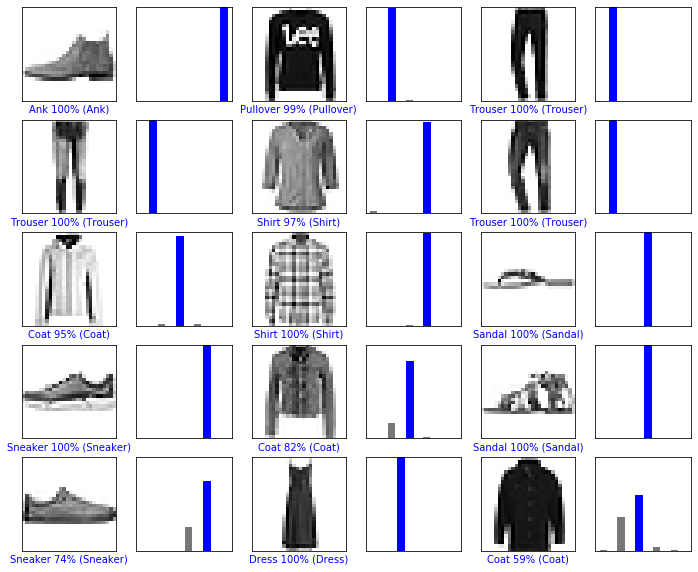

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()